<a href="https://colab.research.google.com/github/yevintheenura01/DL_Assignment/blob/Dinushi/diabetes_prediction_MLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# =======================================================
# 🧠 Diabetes Prediction using MLP (Load from Drive)
# =======================================================
!pip install tensorflow scikit-learn seaborn matplotlib pandas numpy -q

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, roc_auc_score, roc_curve, classification_report
)
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [4]:
train_df = pd.read_csv("/content/drive/MyDrive/DiabetesPrediction/outputs/clean_data_train.csv")
test_df = pd.read_csv("/content/drive/MyDrive/DiabetesPrediction/outputs/clean_data_test.csv")

X_train = train_df.drop('diabetes', axis=1).values
y_train = train_df['diabetes'].values
X_test = test_df.drop('diabetes', axis=1).values
y_test = test_df['diabetes'].values

print("✅ Preprocessed data loaded successfully!")
print(f"Training set: {X_train.shape}, Test set: {X_test.shape}")


✅ Preprocessed data loaded successfully!
Training set: (140262, 8), Test set: (35066, 8)


In [5]:
# Build Sequential MLP Model
model = Sequential([
    Dense(32, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.2),
    Dense(16, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='sigmoid')
])

# Compile model
model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

model.summary()


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 32)             │           288 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 833 (3.25 KB)

 Trainable params: 833 (3.25 KB)

 Non-trainable params: 0 (0.00 B)

In [12]:
# Train the model
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=50,
    batch_size=64,
    verbose=1
)


Epoch 1/50
2192/2192 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9150 - loss: 0.1737 - val_accuracy: 0.9155 - val_loss: 0.1713
Epoch 2/50
2192/2192 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9155 - loss: 0.1726 - val_accuracy: 0.9156 - val_loss: 0.1719
Epoch 3/50
2192/2192 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9172 - loss: 0.1708 - val_accuracy: 0.9154 - val_loss: 0.1713
Epoch 4/50
2192/2192 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9160 - loss: 0.1721 - val_accuracy: 0.9154 - val_loss: 0.1723
Epoch 5/50
2192/2192 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9155 - loss: 0.1722 - val_accuracy: 0.9159 - val_loss: 0.1724
Epoch 6/50
2192/2192 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9162 - loss: 0.1729 - val_accuracy: 0.9146 - val_loss: 0.1726
Epoch 7/50
2192/2192 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9162 - loss: 0.1733 - val_accuracy: 0.9152 - val_loss: 0.1715
Epoch 8/50
2192/2192 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9157 - loss: 0.1719 -

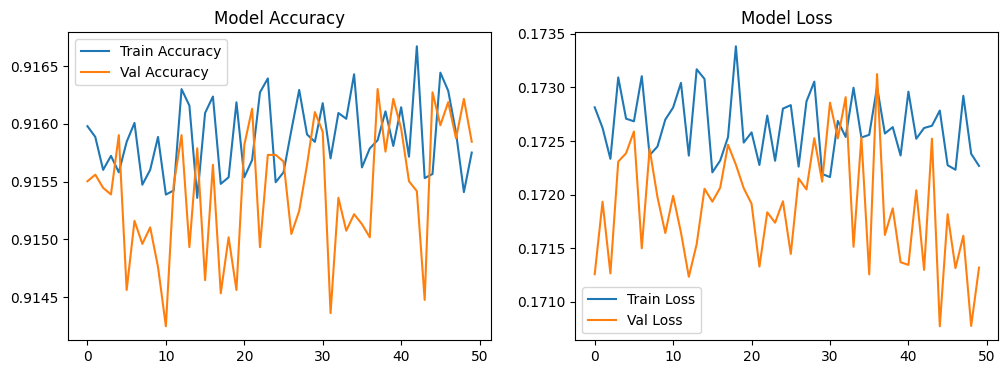

In [13]:
# Plot accuracy and loss
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Model Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Model Loss')
plt.legend()

plt.show()


1096/1096 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
✅ Test Accuracy: 0.9158
Precision: 0.8988 | Recall: 0.9373 | F1-Score: 0.9176 | ROC-AUC: 0.9806

📊 Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.89      0.91     17533
           1       0.90      0.94      0.92     17533

    accuracy                           0.92     35066
   macro avg       0.92      0.92      0.92     35066
weighted avg       0.92      0.92      0.92     35066



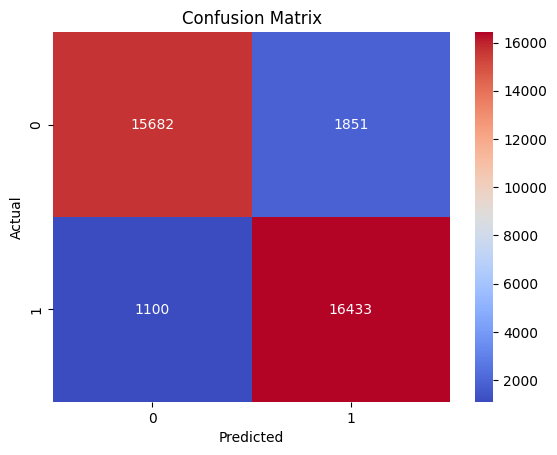

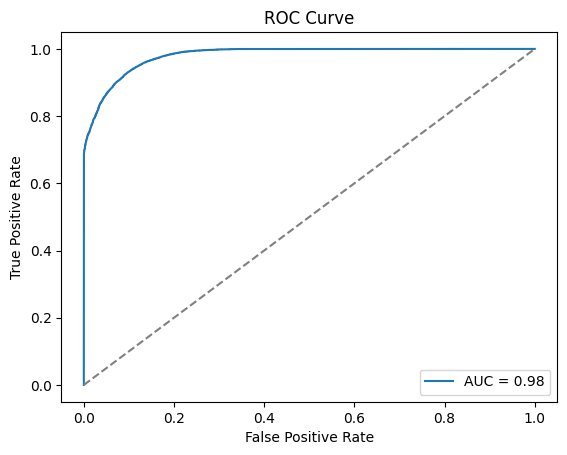

In [14]:
# Predict probabilities and binary outcomes
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int)

# Evaluation metrics
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred_prob)

print(f"✅ Test Accuracy: {acc:.4f}")
print(f"Precision: {prec:.4f} | Recall: {rec:.4f} | F1-Score: {f1:.4f} | ROC-AUC: {auc:.4f}")

# Classification Report
print("\n📊 Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='coolwarm')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
plt.plot(fpr, tpr, label=f"AUC = {auc:.2f}")
plt.plot([0,1], [0,1], linestyle='--', color='gray')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()


In [15]:
# Save trained model
model_path = os.path.join(drive_dir, "diabetes_mlp_model.h5")
model.save(model_path)
print(f"💾 Model saved successfully to: {model_path}")


💾 Model saved successfully to: /content/drive/MyDrive/DiabetesPrediction/outputs/diabetes_mlp_model.h5


In [16]:
# Example input (use the same number of features as training)
sample = np.array([[1, 55, 0, 1, 3, 28.4, 5.8, 140]])  # Example values

prediction = model.predict(sample)
if prediction > 0.5:
    print("🩸 The person is likely to be DIABETIC.")
else:
    print("💃 The person is likely NOT diabetic.")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
🩸 The person is likely to be DIABETIC.
